# 2. Data exploration

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as scb

from scipy.stats import spearmanr, pearsonr

import scp.plots as pl
import scp.utils as utils
import scp.metrics as metrics

np.random.seed(0)

Let's load the data.

In [2]:
adata = sc.read_h5ad("../../../data/processed/leduc2022_pSCoPE_proteins_norm2.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 1543 × 2844
    obs: 'Set', 'Channel', 'SampleAnnotation', 'SampleType', 'lcbatch', 'sortday', 'digest', 'MelanomaSubCluster'
    var: 'Leading.razor.protein', 'Leading.razor.protein.id', 'Leading.razor.protein.symbol'
    uns: 'X_name'

In [4]:
adata.obs.head()

,Set,Channel,SampleAnnotation,SampleType,lcbatch,sortday,digest,MelanomaSubCluster
eAL00219RI10,eAL00219,RI10,u,Monocyte,C,B,88,NaN
eAL00224RI10,eAL00224,RI10,u,Monocyte,C,B,93,NaN
wAL00208RI10,wAL00208,RI10,u,Monocyte,A,B,9,NaN
wAL00208RI13,wAL00208,RI13,m,Melanoma,A,B,9,A
wAL00208RI14,wAL00208,RI14,m,Melanoma,A,B,9,A


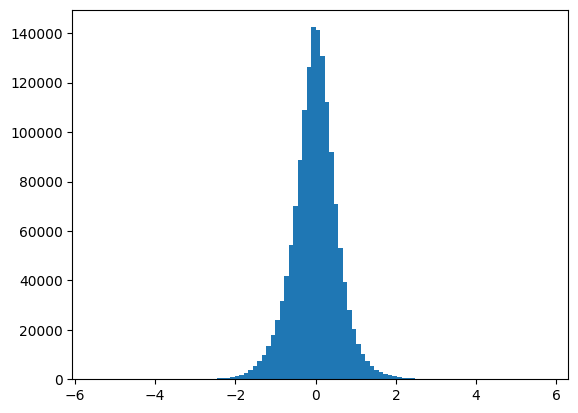

In [5]:
plt.hist(adata.X.flatten(), bins=100)
plt.show()

In [6]:
adata = utils.sort_anndata_by_missingness(adata)

[]

/home/rasmus/anaconda3/envs/scp/lib/python3.10/site-packages/matplotlib/image.py:492: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


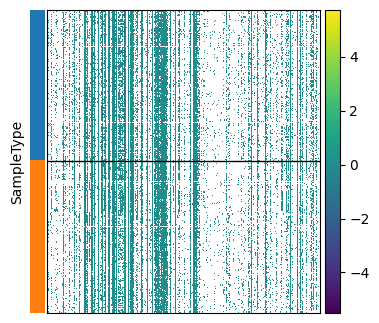

In [7]:
ax = sc.pl.heatmap(adata, var_names=adata.var_names, groupby="SampleType", show_gene_labels=False, figsize=(4, 4), show=False)
ax["groupby_ax"].set_yticks([])

In [9]:
protein_missingness = utils.get_missingness_per_protein(adata)
print(f"Proteins with no missing values in main: {np.sum(protein_missingness == 0) / len(protein_missingness) * 100:.2f}%")

Proteins with no missing values in main: 0.46%


/tmp/ipykernel_11637/950789311.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


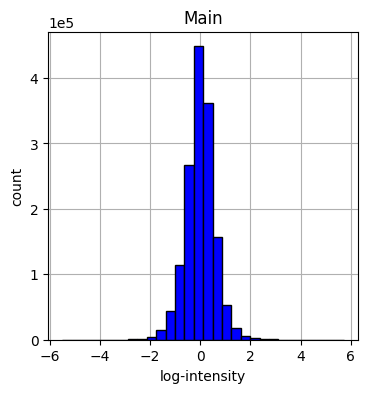

In [13]:
fig, ax = plt.subplots(figsize=(4, 4))

x = adata.X
ax.hist(x[~np.isnan(x)], bins=30, color="blue", edgecolor="black")
ax.grid(True)
ax.set_axisbelow(True)
ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax.set_xlabel("log-intensity")
ax.set_ylabel("count")
ax.set_title("Main")

fig.show()

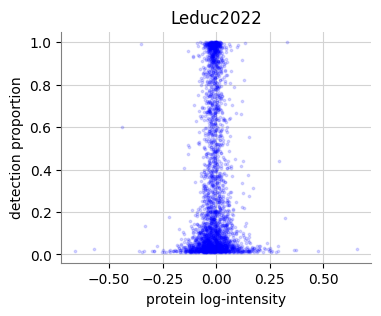

In [15]:
pl.scatter_protein_detection_proportion_and_intensity(adata.X, title="Leduc2022")